In [7]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm

In [8]:
#--SETUP1: ---------------------------------------------------------------------------------
path_name = "vb_eps_-3_3_200/all_values.npz"
VBs = np.linspace(-3, 3, 200) # np.linspace(-3,3, 200)
epsilons = np.linspace(-3, 3, 200) # np.linspace(-3, 3, 200)
lamdas = np.linspace(0, 0.24, 10)

In [9]:
#--SETUP2: ---------------------------------------------------------------------------------


T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

Is = []
I_vars = []
J_QHs = []
Ps = []
TURs = []
effs = []
sigmas = []

In [10]:
#=========================================Read from file:===============================================================
data = np.load(path_name)
Is, I_vars, Ps, J_QHs, sigmas, TURs, effs = data['Is'], data['I_vars'], data['Ps'], data['J_QHs'], data['sigmas'], data['TURs'], data['effs']


In [11]:
print(TURs.shape)
print(np.nanmin(TURs))

(10, 200, 200)
1.9668188041184926


In [12]:
I_array = []
I_array_float = []
I_var_array = []
I_var_array_float = []
J_QH_array = []
J_QH_array_float = []
P_array = []
P_array_float = []
TUR_array_fixed = []
TUR_array_floating = []
eff_array = []
eff_array_float = []
sigma_array = []
sigma_array_float = []

min_epses = []
min_vbs = []

Epsilon, VB = np.meshgrid(epsilons, VBs)

TUR_temp = TURs[0]
min_TUR = np.nanmin(TUR_temp)
print(min_TUR)
min_indices = np.argwhere(TUR_temp == min_TUR)
if len(min_indices) > 1:
    raise ValueError("More than one minimal value!")
min_x = min_indices[0][0]
min_y = min_indices[0][1]

#Fixed point
for idx, lmda in enumerate(lamdas):
    I = Is[idx]
    I_var = I_vars[idx]
    J_QH = J_QHs[idx]
    P = Ps[idx]
    TUR = TURs[idx]
    eff = effs[idx]
    sigma = sigmas[idx]
    #print("Min TUR: ", TUR[min_x, min_y])
    #print(f"\tat: epsilon: {Epsilon[min_x, min_y]} and VB: {VB[min_x, min_y]}")
    #print("\t Power here: ", P[min_x, min_y])
    I_array.append(I[min_x, min_y])
    I_var_array.append(I_var[min_x, min_y])
    J_QH_array.append(J_QH[min_x, min_y])
    P_array.append(P[min_x, min_y])
    TUR_array_fixed.append(TUR[min_x, min_y])
    eff_array.append(eff[min_x, min_y])
    sigma_array.append(sigma[min_x, min_y])

#Allways choosing the point with minimal TUR value
for idx, lmda in enumerate(lamdas):
    TUR = TURs[idx]
    min_TUR = np.nanmin(TUR)
    min_indices = np.argwhere(TUR == min_TUR)
    if len(min_indices) > 1:
        raise ValueError("More than one minimal value!")
    min_x = min_indices[0][0]
    min_y = min_indices[0][1]
    I_array_float.append(I[min_x, min_y])
    I_var_array_float.append(I_var[min_x, min_y])
    J_QH_array_float.append(J_QH[min_x, min_y])
    P_array_float.append(P[min_x, min_y])
    TUR_array_floating.append(min_TUR)
    eff_array_float.append(eff[min_x, min_y])
    sigma_array_float.append(sigma[min_x, min_y])
    min_epses.append(Epsilon[min_x, min_y])
    min_vbs.append(VB[min_x, min_y])



1.9668188041184926


[0.         0.02666667 0.05333333 0.08       0.10666667 0.13333333
 0.16       0.18666667 0.21333333 0.24      ]


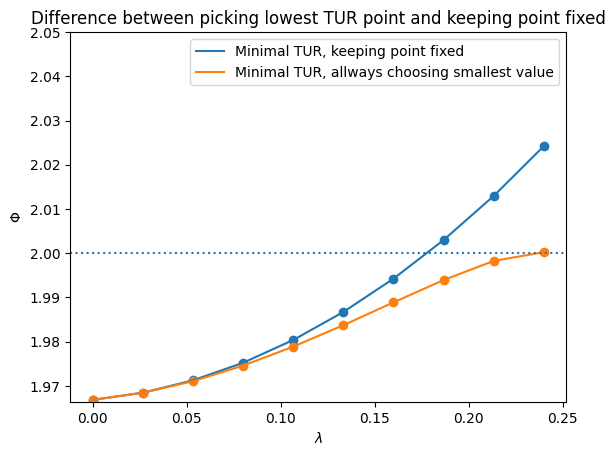

In [13]:
print(lamdas)
plt.plot(lamdas, TUR_array_fixed, label='Minimal TUR, keeping point fixed')
plt.plot(lamdas, TUR_array_floating, label='Minimal TUR, allways choosing smallest value')
plt.scatter(lamdas, TUR_array_fixed)
plt.scatter(lamdas, TUR_array_floating)
plt.title("Difference between picking lowest TUR point and keeping point fixed")
plt.axhline(y=2, linestyle=':')
plt.ylabel(r"$\Phi$")
plt.xlabel(r'$\lambda$')
plt.ylim(1.9664, 2.05)
plt.legend()
plt.show()


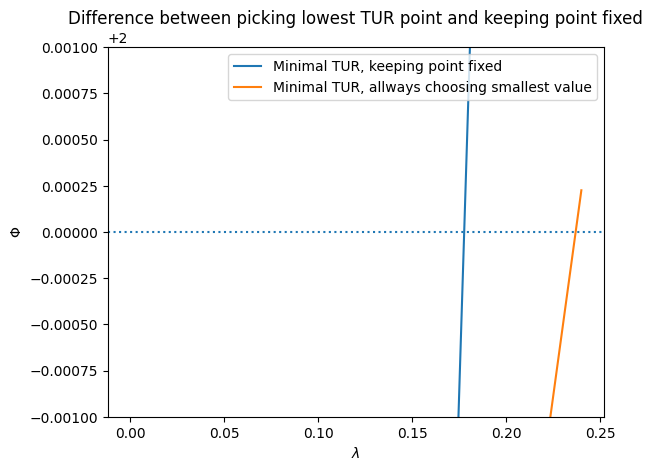

In [14]:
plt.plot(lamdas, TUR_array_fixed, label='Minimal TUR, keeping point fixed')
plt.plot(lamdas, TUR_array_floating, label='Minimal TUR, allways choosing smallest value')
plt.title("Difference between picking lowest TUR point and keeping point fixed")
plt.axhline(y=2, linestyle=':')
plt.ylabel(r"$\Phi$")
plt.xlabel(r'$\lambda$')
plt.ylim(1.999, 2.001)
plt.legend()
plt.show()

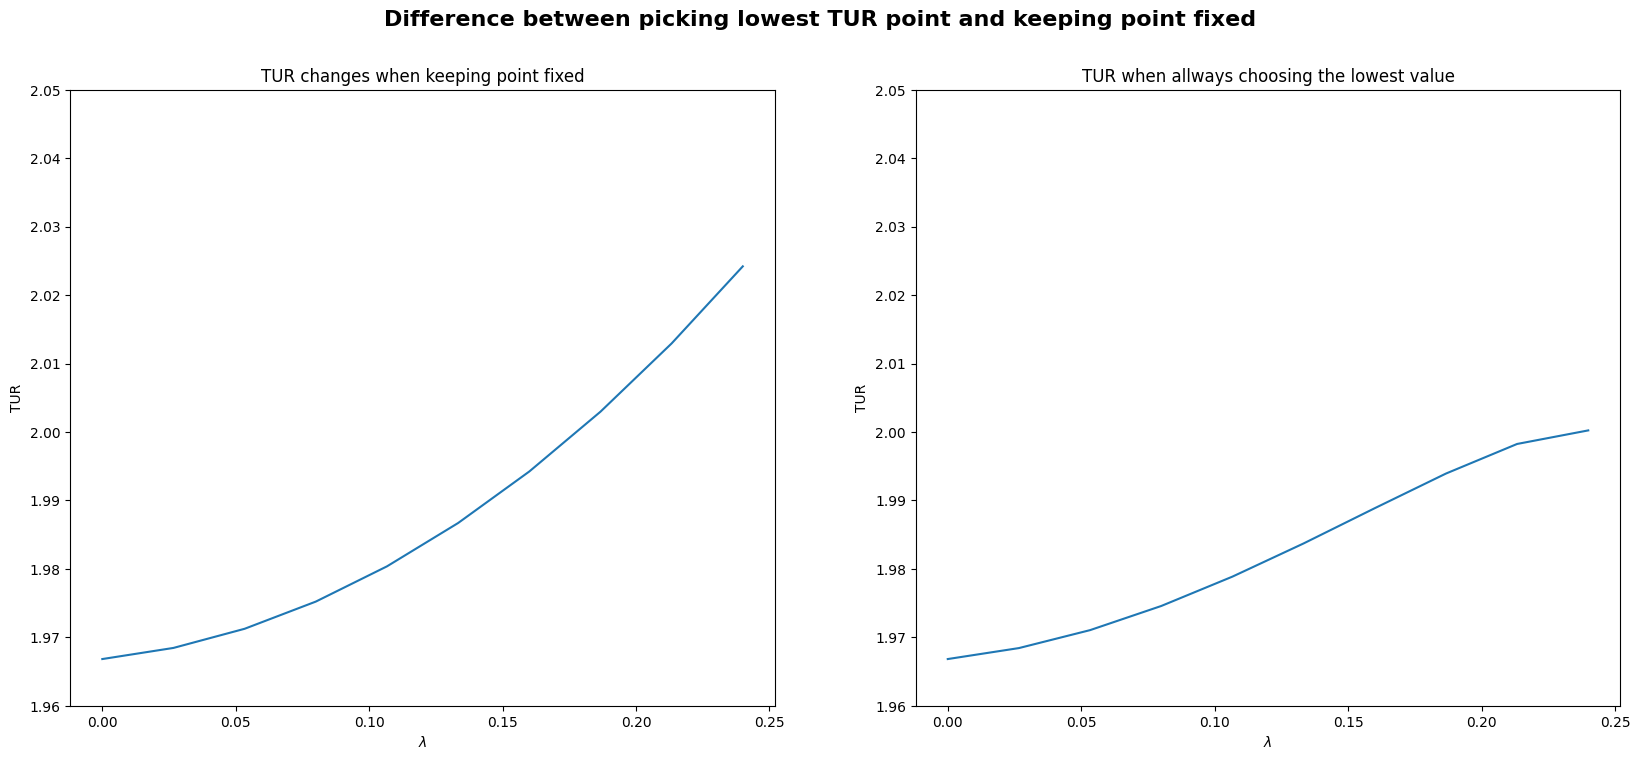

In [15]:
"ys should be list/tuple with two entrys and y_names containes the corresponding names"
importlib.reload(pm)
pm.plot_two(lamdas, r"$\lambda$", (TUR_array_fixed, TUR_array_floating),
            ("TUR", "TUR"),
             ("TUR changes when keeping point fixed", "TUR when allways choosing the lowest value"),
               "Difference between picking lowest TUR point and keeping point fixed")

[0.         0.02666667 0.05333333 0.08       0.10666667 0.13333333
 0.16       0.18666667 0.21333333 0.24      ]


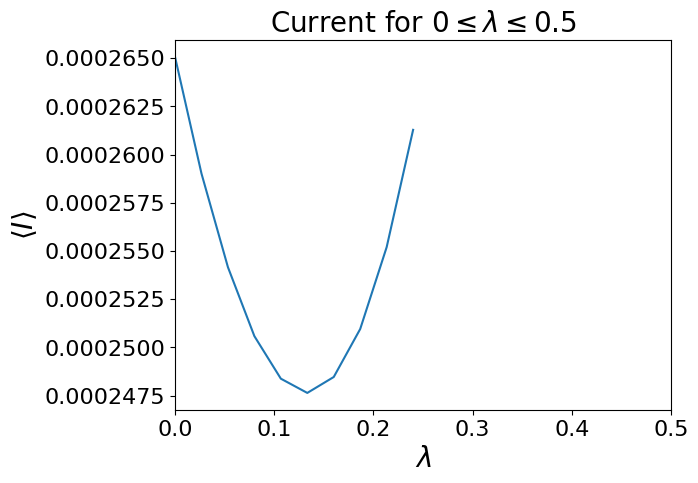

In [16]:

plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], I_array[0:11])
plt.title(r'Current for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\langle I \rangle$', fontsize=font_size)
plt.xlim(0,0.5)
#plt.scatter(0.95, 0.0006)

print(lamdas)

(0.0, 0.5)

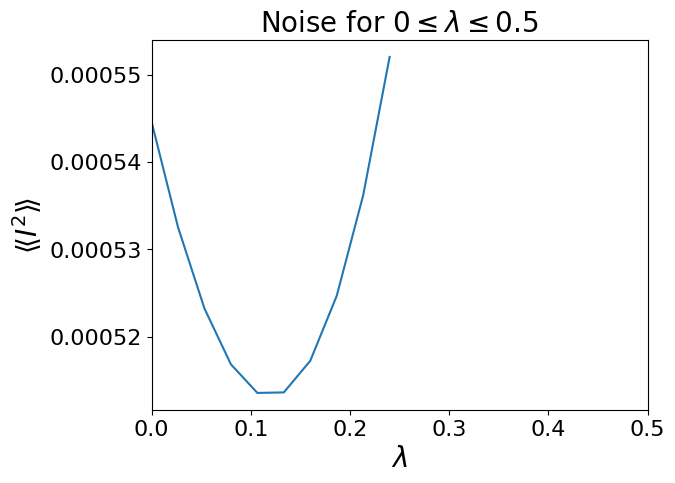

In [17]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], I_var_array[0:11])
plt.title(r'Noise for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\langle\!\langle I^2 \rangle\!\rangle$', fontsize=font_size)
plt.xlim(0,0.5)

(0.0, 0.5)

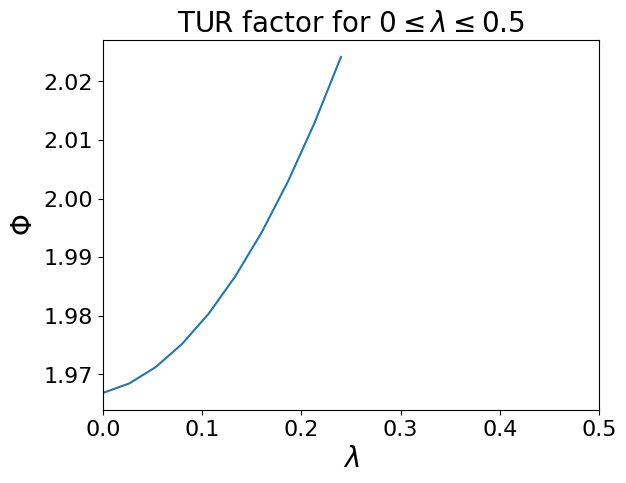

In [18]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], TUR_array_fixed[0:11])
plt.title(r'TUR factor for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\Phi$', fontsize=font_size)
plt.xlim(0,0.5)

(0.0, 0.5)

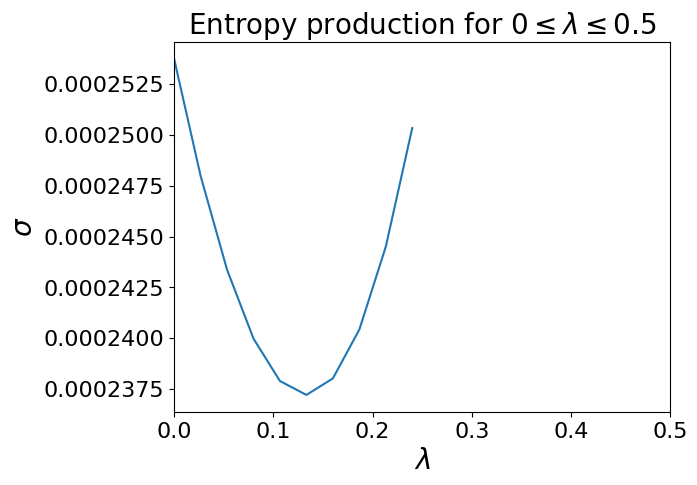

In [19]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], sigma_array[0:11])
plt.title(r'Entropy production for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\sigma$', fontsize=font_size)
plt.xlim(0,0.5)

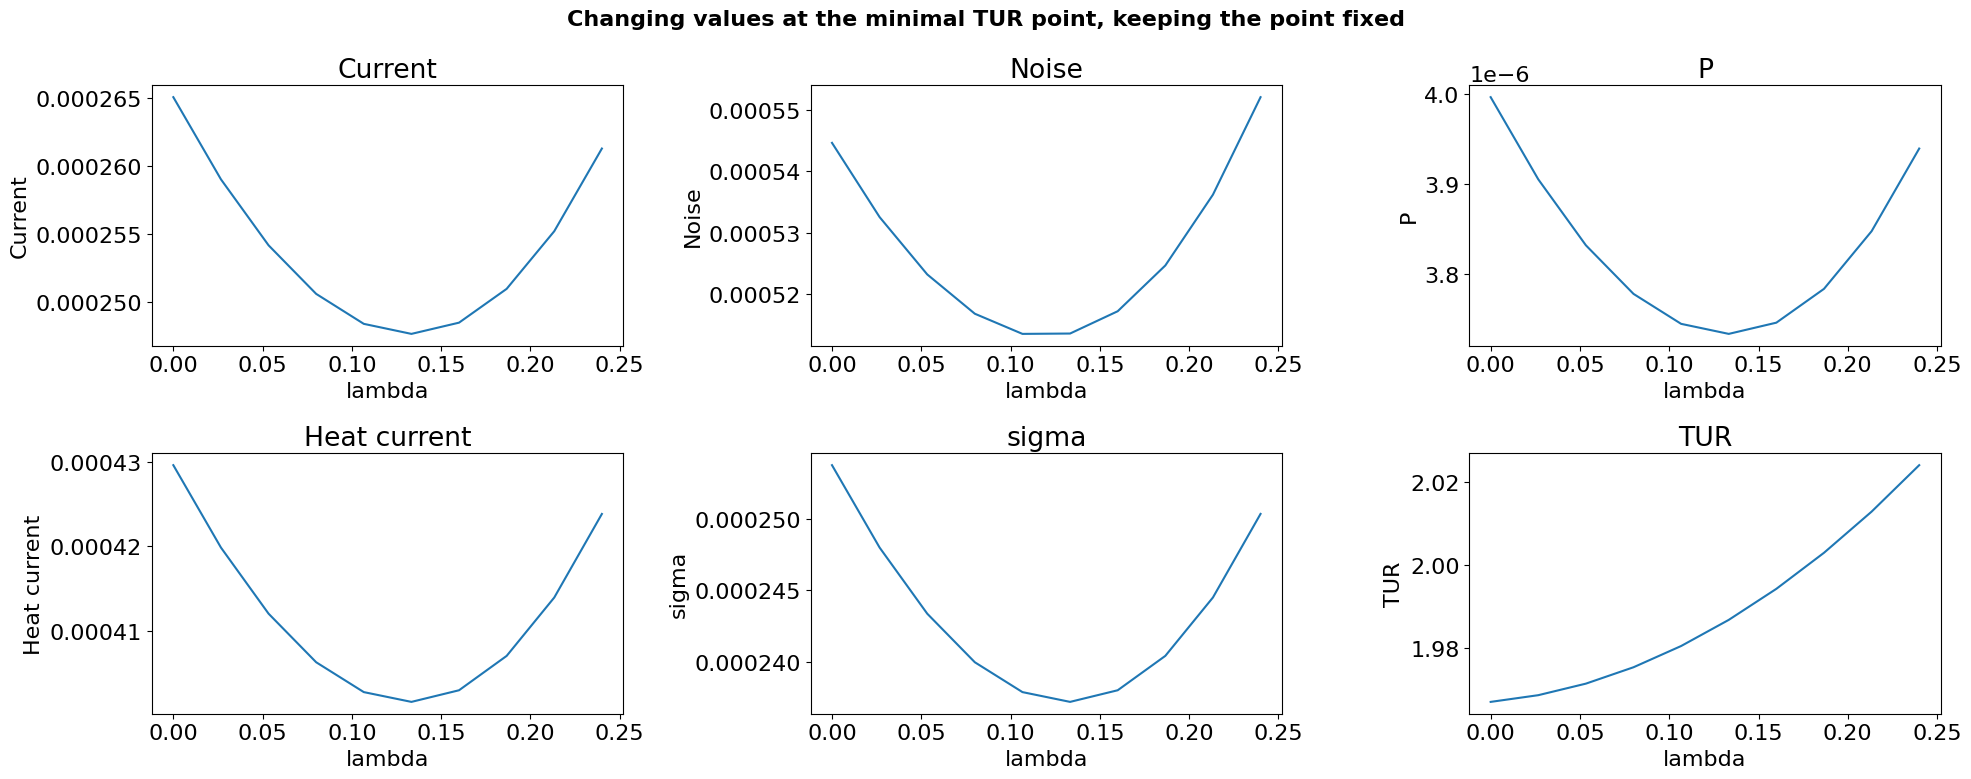

In [20]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array, I_var_array, P_array, J_QH_array, sigma_array, TUR_array_fixed,
               "Changing values at the minimal TUR point, keeping the point fixed")

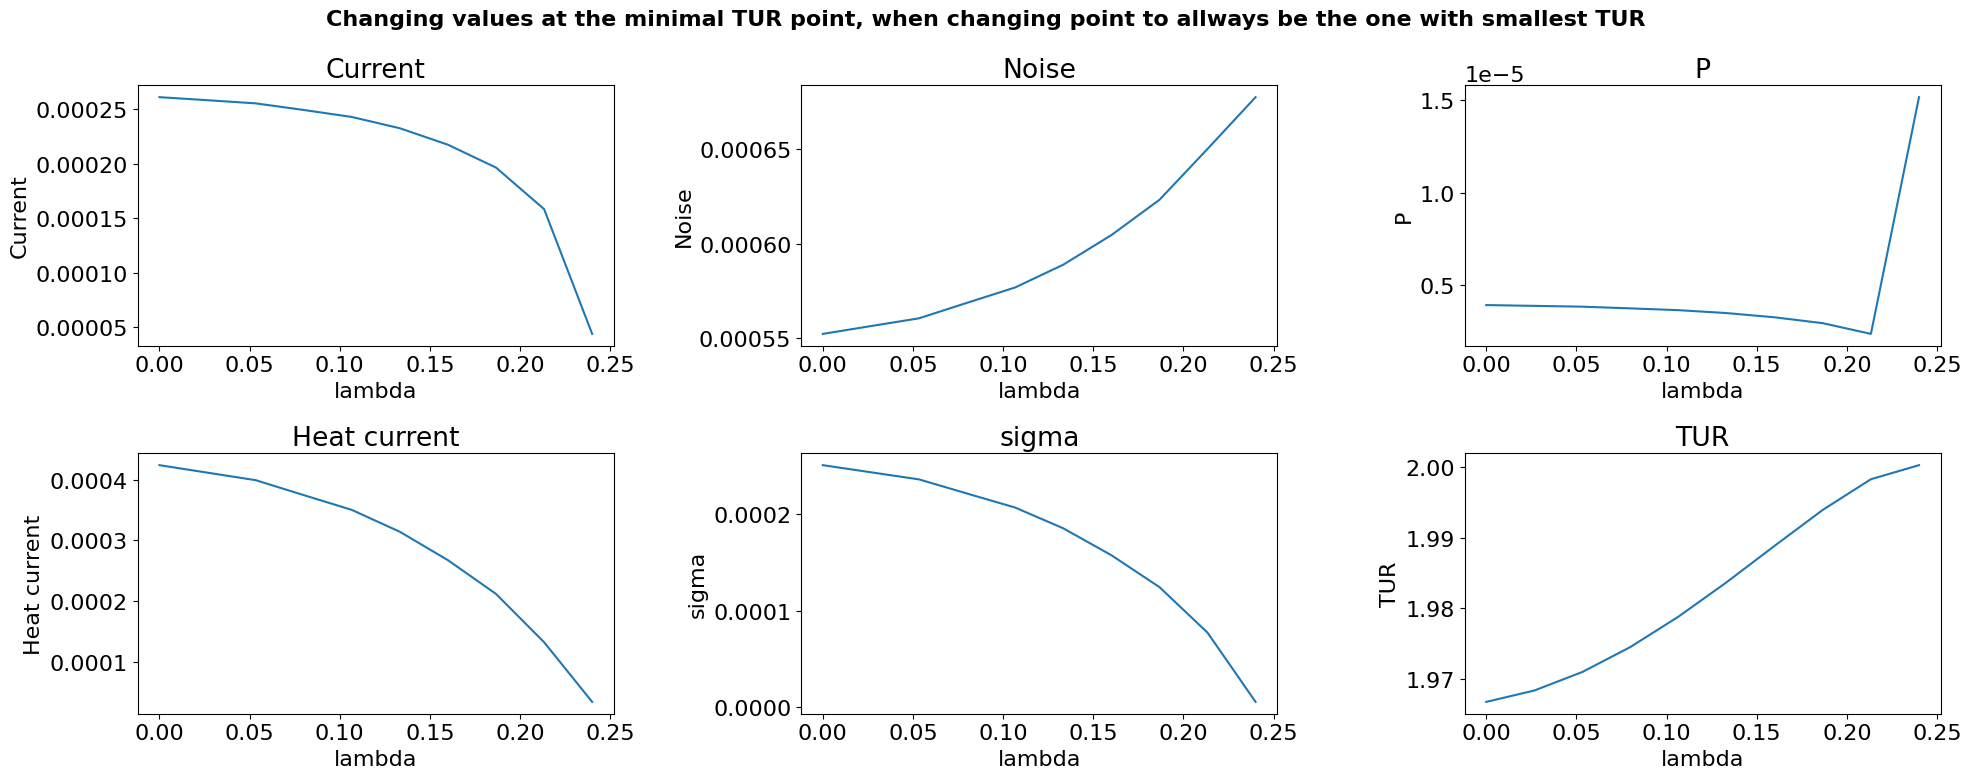

In [21]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array_float, I_var_array_float, P_array_float, J_QH_array_float, sigma_array_float, TUR_array_floating,
               "Changing values at the minimal TUR point, when changing point to allways be the one with smallest TUR")

eps [np.float64(1.2211055276381906), np.float64(1.0703517587939695), np.float64(0.829145728643216), np.float64(0.6180904522613062)]
vb [np.float64(0.015075376884421843), np.float64(0.015075376884421843), np.float64(0.015075376884421843), np.float64(0.3467336683417086)]


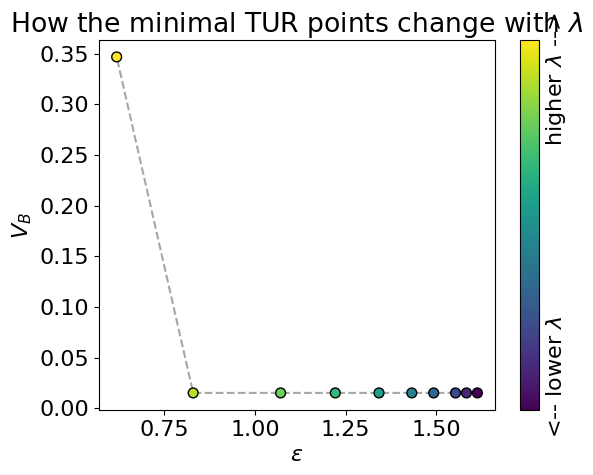

In [22]:
print('eps',min_epses[6:])
print('vb', min_vbs[6:])
importlib.reload(pm)
pm.plot_minimal_TUR_points(min_epses, min_vbs)
